In [51]:
import numpy as np
import re
import swifter
import spacy
import pandas as pd
from pathlib import Path
from typing import Tuple

nlp = spacy.load('en')

def parse_case_filename(fname: str) -> Tuple[int, str]:
    m = re.search(r'cases/(\d+)_(\w+).txt', str(fname))
    year = m.group(1)
    id = m.group(2)
    return year, id

case_files = [x for x in Path('cases').iterdir()]

years = []
ids = []
for x in case_files:
    year, id = parse_case_filename(x)
    years.append(year)
    ids.append(id)


def create_initial_df():
  df = pd.DataFrame(data={
      'caseid': ids,
      'year': years,
      'file': case_files},
                    columns=['caseid', 'year', 'file'])


  # SpaCy is so slow that even for this it takes half an hour :(
  df = df.sample(n=1000)

  df_md = pd.read_csv('case_metadata.csv')
  df_md = df_md.drop(['year'], axis=1)

  df = df.merge(df_md, on=['caseid'], how='left')

  def parse_file(fname: str):
      text = Path(fname).read_text()
      doc = nlp(text)
      return doc.to_bytes()

  df['doc_bytes'] = df['file'].swifter.apply(parse_file)

  with open('vocab.pkl', 'wb') as f:
      f.write(nlp.vocab.to_bytes())

  df.to_pickle('init_db.pkl')

def get_df():
    pck = Path('init_db.pkl')
    if not pck.exists():
        create_initial_df()

    assert Path('vocab.pkl').exists()

    nlp.vocab.from_bytes(Path('vocab.pkl').read_bytes())

    def bytes_to_doc(doc_bytes):
        return spacy.tokens.Doc(
            nlp.vocab
        ).from_bytes(doc_bytes)


    df = pd.read_pickle(str(pck))

    df['doc'] = df['doc_bytes'].swifter.apply(bytes_to_doc)
    return df




In [3]:

df = get_df()
df = df.drop(['doc_bytes'], axis=1)
df = df.dropna(axis=0)

print(f'We have {len(df)} examples')


Pandas Apply:   0%|          | 0/1027 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 2/1027 [00:00<01:15, 13.57it/s]

Pandas Apply:   0%|          | 4/1027 [00:00<01:08, 14.98it/s]

Pandas Apply:   1%|          | 6/1027 [00:00<01:06, 15.46it/s]

Pandas Apply:   1%|          | 11/1027 [00:00<00:52, 19.25it/s]

Pandas Apply:   1%|▏         | 14/1027 [00:00<00:53, 18.88it/s]

Pandas Apply:   2%|▏         | 19/1027 [00:00<00:43, 23.01it/s]

Pandas Apply:   2%|▏         | 22/1027 [00:00<00:42, 23.54it/s]

Pandas Apply:   2%|▏         | 25/1027 [00:00<00:40, 24.79it/s]

Pandas Apply:   3%|▎         | 28/1027 [00:01<00:39, 25.13it/s]

Pandas Apply:   3%|▎         | 31/1027 [00:01<00:40, 24.63it/s]

Pandas Apply:   3%|▎         | 34/1027 [00:01<00:49, 20.06it/s]

Pandas Apply:   4%|▎         | 37/1027 [00:01<00:57, 17.08it/s]

Pandas Apply:   4%|▍         | 41/1027 [00:01<00:55, 17.79it/s]

Pandas Apply:   4%|▍         | 45/1027 [00:01<00:47, 20.89it/s]

Pandas Apply:   5%|▍         | 48/1027 [00:02<00:44, 22.03it/s]

Pandas Apply:   5%|▍         | 51/1027 [00:02<00:50, 19.47it/s]

Pandas Apply:   5%|▌         | 54/1027 [00:02<00:53, 18.18it/s]

Pandas Apply:   6%|▌         | 59/1027 [00:02<00:43, 22.14it/s]

Pandas Apply:   6%|▌         | 62/1027 [00:02<00:42, 22.91it/s]

Pandas Apply:   6%|▋         | 65/1027 [00:02<00:39, 24.13it/s]

Pandas Apply:   7%|▋         | 68/1027 [00:03<00:52, 18.25it/s]

Pandas Apply:   7%|▋         | 71/1027 [00:03<00:48, 19.52it/s]

Pandas Apply:   7%|▋         | 74/1027 [00:03<00:49, 19.40it/s]

Pandas Apply:   7%|▋         | 77/1027 [00:03<00:44, 21.24it/s]

Pandas Apply:   8%|▊         | 80/1027 [00:03<00:44, 21.37it/s]

Pandas Apply:   8%|▊         | 83/1027 [00:03<00:47, 19.80it/s]

Pandas Apply:   8%|▊         | 86/1027 [00:04<00:58, 16.09it/s]

Pandas Apply:   9%|▊         | 89/1027 [00:04<00:50, 18.42it/s]

Pandas Apply:   9%|▉         | 92/1027 [00:04<00:48, 19.38it/s]

Pandas Apply:   9%|▉         | 95/1027 [00:04<00:50, 18.30it/s]

Pandas Apply:  10%|▉         | 98/1027 [00:04<00:46, 19.98it/s]

Pandas Apply:  10%|▉         | 101/1027 [00:05<01:18, 11.76it/s]

Pandas Apply:  10%|█         | 104/1027 [00:05<01:12, 12.67it/s]

Pandas Apply:  11%|█         | 108/1027 [00:05<00:57, 15.86it/s]

Pandas Apply:  11%|█         | 112/1027 [00:05<00:47, 19.34it/s]

Pandas Apply:  11%|█         | 115/1027 [00:05<00:47, 19.39it/s]

Pandas Apply:  11%|█▏        | 118/1027 [00:05<00:44, 20.65it/s]

Pandas Apply:  12%|█▏        | 121/1027 [00:05<00:42, 21.10it/s]

Pandas Apply:  12%|█▏        | 124/1027 [00:06<00:50, 17.77it/s]

Pandas Apply:  12%|█▏        | 127/1027 [00:06<00:51, 17.41it/s]

Pandas Apply:  13%|█▎        | 130/1027 [00:06<00:54, 16.61it/s]

Pandas Apply:  13%|█▎        | 133/1027 [00:06<00:50, 17.88it/s]

Pandas Apply:  13%|█▎        | 135/1027 [00:06<00:48, 18.42it/s]

Pandas Apply:  13%|█▎        | 137/1027 [00:06<00:47, 18.65it/s]

Pandas Apply:  14%|█▎        | 140/1027 [00:07<00:50, 17.60it/s]

Pandas Apply:  14%|█▍        | 142/1027 [00:07<00:51, 17.18it/s]

Pandas Apply:  14%|█▍        | 147/1027 [00:07<00:41, 21.03it/s]

Pandas Apply:  15%|█▍        | 150/1027 [00:07<00:40, 21.45it/s]

Pandas Apply:  15%|█▍        | 153/1027 [00:07<00:43, 20.19it/s]

Pandas Apply:  15%|█▌        | 156/1027 [00:07<00:40, 21.58it/s]

Pandas Apply:  15%|█▌        | 159/1027 [00:07<00:38, 22.36it/s]

Pandas Apply:  16%|█▌        | 162/1027 [00:08<00:42, 20.13it/s]

Pandas Apply:  16%|█▌        | 165/1027 [00:08<00:48, 17.67it/s]

Pandas Apply:  16%|█▋        | 168/1027 [00:08<00:45, 18.81it/s]

Pandas Apply:  17%|█▋        | 171/1027 [00:08<00:46, 18.43it/s]

Pandas Apply:  17%|█▋        | 173/1027 [00:08<00:47, 17.94it/s]

Pandas Apply:  17%|█▋        | 178/1027 [00:08<00:39, 21.34it/s]

Pandas Apply:  18%|█▊        | 183/1027 [00:08<00:32, 25.69it/s]

Pandas Apply:  18%|█▊        | 188/1027 [00:09<00:29, 28.35it/s]

Pandas Apply:  19%|█▊        | 192/1027 [00:09<00:31, 26.46it/s]

Pandas Apply:  19%|█▉        | 196/1027 [00:09<00:37, 21.96it/s]

Pandas Apply:  19%|█▉        | 199/1027 [00:09<00:41, 20.01it/s]

Pandas Apply:  20%|█▉        | 202/1027 [00:09<00:43, 18.89it/s]

Pandas Apply:  20%|██        | 206/1027 [00:09<00:37, 21.94it/s]

Pandas Apply:  20%|██        | 210/1027 [00:10<00:35, 22.91it/s]

Pandas Apply:  21%|██        | 213/1027 [00:10<00:37, 21.97it/s]

Pandas Apply:  21%|██        | 216/1027 [00:10<00:34, 23.69it/s]

Pandas Apply:  21%|██▏       | 219/1027 [00:10<00:33, 24.02it/s]

Pandas Apply:  22%|██▏       | 222/1027 [00:10<00:33, 23.77it/s]

Pandas Apply:  22%|██▏       | 225/1027 [00:10<00:31, 25.19it/s]

Pandas Apply:  22%|██▏       | 229/1027 [00:10<00:29, 26.89it/s]

Pandas Apply:  23%|██▎       | 232/1027 [00:11<00:37, 20.99it/s]

Pandas Apply:  23%|██▎       | 239/1027 [00:11<00:29, 26.52it/s]

Pandas Apply:  24%|██▎       | 243/1027 [00:11<00:27, 28.93it/s]

Pandas Apply:  24%|██▍       | 247/1027 [00:11<00:38, 20.00it/s]

Pandas Apply:  24%|██▍       | 250/1027 [00:11<00:38, 19.99it/s]

Pandas Apply:  25%|██▍       | 253/1027 [00:11<00:39, 19.83it/s]

Pandas Apply:  25%|██▌       | 257/1027 [00:12<00:33, 23.18it/s]

Pandas Apply:  25%|██▌       | 260/1027 [00:12<00:32, 23.28it/s]

Pandas Apply:  26%|██▌       | 263/1027 [00:12<00:30, 24.68it/s]

Pandas Apply:  26%|██▌       | 266/1027 [00:12<00:30, 25.23it/s]

Pandas Apply:  26%|██▌       | 269/1027 [00:12<00:29, 25.74it/s]

Pandas Apply:  26%|██▋       | 272/1027 [00:12<00:32, 23.14it/s]

Pandas Apply:  27%|██▋       | 275/1027 [00:12<00:31, 23.73it/s]

Pandas Apply:  27%|██▋       | 279/1027 [00:12<00:29, 25.03it/s]

Pandas Apply:  27%|██▋       | 282/1027 [00:13<00:29, 25.33it/s]

Pandas Apply:  28%|██▊       | 287/1027 [00:13<00:29, 25.06it/s]

Pandas Apply:  28%|██▊       | 290/1027 [00:13<00:32, 22.36it/s]

Pandas Apply:  29%|██▊       | 293/1027 [00:13<00:32, 22.57it/s]

Pandas Apply:  29%|██▉       | 296/1027 [00:13<00:30, 23.94it/s]

Pandas Apply:  29%|██▉       | 300/1027 [00:13<00:28, 25.52it/s]

Pandas Apply:  30%|██▉       | 303/1027 [00:13<00:30, 23.90it/s]

Pandas Apply:  30%|███       | 309/1027 [00:14<00:26, 27.23it/s]

Pandas Apply:  30%|███       | 312/1027 [00:14<00:28, 25.26it/s]

Pandas Apply:  31%|███       | 316/1027 [00:14<00:27, 26.31it/s]

Pandas Apply:  31%|███       | 319/1027 [00:14<00:27, 25.94it/s]

Pandas Apply:  31%|███▏      | 322/1027 [00:14<00:26, 26.39it/s]

Pandas Apply:  32%|███▏      | 325/1027 [00:14<00:31, 22.44it/s]

Pandas Apply:  32%|███▏      | 328/1027 [00:14<00:35, 19.60it/s]

Pandas Apply:  32%|███▏      | 331/1027 [00:15<00:32, 21.53it/s]

Pandas Apply:  33%|███▎      | 334/1027 [00:15<00:36, 18.99it/s]

Pandas Apply:  33%|███▎      | 338/1027 [00:15<00:30, 22.29it/s]

Pandas Apply:  33%|███▎      | 341/1027 [00:15<00:28, 23.83it/s]

Pandas Apply:  34%|███▍      | 347/1027 [00:15<00:24, 27.94it/s]

Pandas Apply:  34%|███▍      | 351/1027 [00:15<00:24, 27.90it/s]

Pandas Apply:  35%|███▍      | 355/1027 [00:15<00:22, 30.32it/s]

Pandas Apply:  35%|███▍      | 359/1027 [00:15<00:23, 29.01it/s]

Pandas Apply:  35%|███▌      | 363/1027 [00:16<00:25, 26.23it/s]

Pandas Apply:  36%|███▌      | 366/1027 [00:16<00:26, 25.30it/s]

Pandas Apply:  36%|███▌      | 369/1027 [00:16<00:33, 19.87it/s]

Pandas Apply:  36%|███▌      | 372/1027 [00:16<00:32, 20.37it/s]

Pandas Apply:  37%|███▋      | 375/1027 [00:16<00:42, 15.39it/s]

Pandas Apply:  37%|███▋      | 378/1027 [00:17<00:36, 17.75it/s]

Pandas Apply:  37%|███▋      | 383/1027 [00:17<00:31, 20.57it/s]

Pandas Apply:  38%|███▊      | 387/1027 [00:17<00:28, 22.16it/s]

Pandas Apply:  38%|███▊      | 392/1027 [00:17<00:23, 26.53it/s]

Pandas Apply:  39%|███▊      | 396/1027 [00:17<00:22, 27.89it/s]

Pandas Apply:  39%|███▉      | 400/1027 [00:17<00:20, 30.23it/s]

Pandas Apply:  39%|███▉      | 404/1027 [00:17<00:25, 24.65it/s]

Pandas Apply:  40%|███▉      | 408/1027 [00:18<00:25, 23.86it/s]

Pandas Apply:  40%|████      | 411/1027 [00:18<00:25, 24.14it/s]

Pandas Apply:  40%|████      | 414/1027 [00:18<00:25, 24.12it/s]

Pandas Apply:  41%|████      | 417/1027 [00:18<00:32, 18.64it/s]

Pandas Apply:  41%|████      | 420/1027 [00:18<00:29, 20.71it/s]

Pandas Apply:  41%|████▏     | 425/1027 [00:18<00:25, 23.30it/s]

Pandas Apply:  42%|████▏     | 428/1027 [00:19<00:28, 21.21it/s]

Pandas Apply:  42%|████▏     | 434/1027 [00:19<00:23, 25.05it/s]

Pandas Apply:  43%|████▎     | 437/1027 [00:19<00:24, 24.47it/s]

Pandas Apply:  43%|████▎     | 442/1027 [00:19<00:20, 28.23it/s]

Pandas Apply:  44%|████▎     | 448/1027 [00:19<00:22, 25.66it/s]

Pandas Apply:  44%|████▍     | 452/1027 [00:19<00:22, 26.05it/s]

Pandas Apply:  44%|████▍     | 456/1027 [00:19<00:21, 26.60it/s]

Pandas Apply:  45%|████▍     | 459/1027 [00:20<00:24, 23.13it/s]

Pandas Apply:  45%|████▍     | 462/1027 [00:20<00:29, 19.23it/s]

Pandas Apply:  45%|████▌     | 465/1027 [00:20<00:35, 15.73it/s]

Pandas Apply:  46%|████▌     | 469/1027 [00:20<00:29, 18.79it/s]

Pandas Apply:  46%|████▋     | 477/1027 [00:20<00:23, 23.18it/s]

Pandas Apply:  47%|████▋     | 481/1027 [00:21<00:33, 16.42it/s]

Pandas Apply:  47%|████▋     | 484/1027 [00:21<00:30, 17.75it/s]

Pandas Apply:  47%|████▋     | 487/1027 [00:21<00:26, 20.17it/s]

Pandas Apply:  48%|████▊     | 490/1027 [00:21<00:27, 19.69it/s]

Pandas Apply:  48%|████▊     | 493/1027 [00:21<00:28, 18.80it/s]

Pandas Apply:  48%|████▊     | 498/1027 [00:22<00:26, 20.07it/s]

Pandas Apply:  49%|████▉     | 503/1027 [00:22<00:23, 22.24it/s]

Pandas Apply:  49%|████▉     | 506/1027 [00:22<00:22, 22.98it/s]

Pandas Apply:  50%|████▉     | 509/1027 [00:22<00:23, 22.27it/s]

Pandas Apply:  50%|████▉     | 512/1027 [00:22<00:31, 16.37it/s]

Pandas Apply:  50%|█████     | 514/1027 [00:23<00:38, 13.34it/s]

Pandas Apply:  50%|█████     | 517/1027 [00:23<00:35, 14.49it/s]

Pandas Apply:  51%|█████     | 519/1027 [00:23<00:36, 14.04it/s]

Pandas Apply:  51%|█████     | 524/1027 [00:23<00:28, 17.38it/s]

Pandas Apply:  51%|█████▏    | 527/1027 [00:23<00:30, 16.46it/s]

Pandas Apply:  52%|█████▏    | 531/1027 [00:23<00:27, 18.31it/s]

Pandas Apply:  52%|█████▏    | 534/1027 [00:24<00:25, 19.27it/s]

Pandas Apply:  52%|█████▏    | 537/1027 [00:24<00:26, 18.82it/s]

Pandas Apply:  53%|█████▎    | 540/1027 [00:24<00:25, 18.93it/s]

Pandas Apply:  53%|█████▎    | 544/1027 [00:24<00:22, 21.75it/s]

Pandas Apply:  54%|█████▎    | 550/1027 [00:24<00:18, 26.03it/s]

Pandas Apply:  54%|█████▍    | 554/1027 [00:24<00:19, 23.72it/s]

Pandas Apply:  54%|█████▍    | 557/1027 [00:24<00:19, 23.56it/s]

Pandas Apply:  55%|█████▍    | 561/1027 [00:25<00:18, 25.50it/s]

Pandas Apply:  55%|█████▌    | 566/1027 [00:25<00:16, 28.39it/s]

Pandas Apply:  56%|█████▌    | 570/1027 [00:25<00:16, 28.17it/s]

Pandas Apply:  56%|█████▌    | 574/1027 [00:25<00:17, 25.80it/s]

Pandas Apply:  56%|█████▌    | 577/1027 [00:25<00:17, 26.47it/s]

Pandas Apply:  56%|█████▋    | 580/1027 [00:25<00:19, 22.53it/s]

Pandas Apply:  57%|█████▋    | 583/1027 [00:25<00:20, 21.26it/s]

Pandas Apply:  57%|█████▋    | 586/1027 [00:26<00:19, 22.52it/s]

Pandas Apply:  57%|█████▋    | 589/1027 [00:26<00:22, 19.74it/s]

Pandas Apply:  58%|█████▊    | 592/1027 [00:26<00:22, 19.18it/s]

Pandas Apply:  58%|█████▊    | 597/1027 [00:26<00:20, 20.82it/s]

Pandas Apply:  58%|█████▊    | 600/1027 [00:26<00:23, 18.34it/s]

Pandas Apply:  59%|█████▊    | 602/1027 [00:26<00:24, 17.62it/s]

Pandas Apply:  59%|█████▉    | 605/1027 [00:27<00:22, 18.43it/s]

Pandas Apply:  59%|█████▉    | 607/1027 [00:27<00:25, 16.18it/s]

Pandas Apply:  60%|█████▉    | 612/1027 [00:27<00:21, 19.41it/s]

Pandas Apply:  60%|█████▉    | 616/1027 [00:27<00:19, 21.03it/s]

Pandas Apply:  60%|██████    | 619/1027 [00:27<00:18, 22.54it/s]

Pandas Apply:  61%|██████    | 622/1027 [00:27<00:17, 22.63it/s]

Pandas Apply:  61%|██████    | 625/1027 [00:28<00:23, 17.33it/s]

Pandas Apply:  61%|██████    | 628/1027 [00:28<00:20, 19.54it/s]

Pandas Apply:  61%|██████▏   | 631/1027 [00:28<00:25, 15.42it/s]

Pandas Apply:  62%|██████▏   | 637/1027 [00:28<00:26, 14.50it/s]

Pandas Apply:  62%|██████▏   | 640/1027 [00:29<00:25, 15.23it/s]

Pandas Apply:  63%|██████▎   | 642/1027 [00:29<00:26, 14.35it/s]

Pandas Apply:  63%|██████▎   | 646/1027 [00:29<00:23, 16.22it/s]

Pandas Apply:  63%|██████▎   | 648/1027 [00:29<00:27, 13.76it/s]

Pandas Apply:  63%|██████▎   | 650/1027 [00:29<00:28, 13.26it/s]

Pandas Apply:  64%|██████▍   | 656/1027 [00:29<00:21, 17.02it/s]

Pandas Apply:  64%|██████▍   | 659/1027 [00:30<00:19, 18.96it/s]

Pandas Apply:  64%|██████▍   | 662/1027 [00:30<00:17, 21.20it/s]

Pandas Apply:  65%|██████▍   | 667/1027 [00:30<00:14, 24.93it/s]

Pandas Apply:  65%|██████▌   | 671/1027 [00:30<00:16, 22.20it/s]

Pandas Apply:  66%|██████▌   | 675/1027 [00:30<00:14, 24.62it/s]

Pandas Apply:  66%|██████▌   | 680/1027 [00:30<00:12, 28.52it/s]

Pandas Apply:  67%|██████▋   | 684/1027 [00:30<00:15, 22.44it/s]

Pandas Apply:  67%|██████▋   | 687/1027 [00:31<00:14, 23.03it/s]

Pandas Apply:  67%|██████▋   | 690/1027 [00:31<00:15, 21.62it/s]

Pandas Apply:  68%|██████▊   | 694/1027 [00:31<00:14, 23.76it/s]

Pandas Apply:  68%|██████▊   | 699/1027 [00:31<00:12, 26.31it/s]

Pandas Apply:  68%|██████▊   | 702/1027 [00:31<00:13, 24.93it/s]

Pandas Apply:  69%|██████▊   | 706/1027 [00:31<00:11, 27.30it/s]

Pandas Apply:  69%|██████▉   | 710/1027 [00:31<00:12, 26.23it/s]

Pandas Apply:  69%|██████▉   | 713/1027 [00:32<00:13, 23.17it/s]

Pandas Apply:  70%|██████▉   | 717/1027 [00:32<00:12, 25.41it/s]

Pandas Apply:  70%|███████   | 720/1027 [00:32<00:13, 23.44it/s]

Pandas Apply:  70%|███████   | 724/1027 [00:32<00:13, 22.03it/s]

Pandas Apply:  71%|███████   | 727/1027 [00:32<00:14, 20.52it/s]

Pandas Apply:  71%|███████   | 730/1027 [00:32<00:14, 19.90it/s]

Pandas Apply:  72%|███████▏  | 735/1027 [00:33<00:14, 19.79it/s]

Pandas Apply:  72%|███████▏  | 738/1027 [00:33<00:14, 19.84it/s]

Pandas Apply:  72%|███████▏  | 742/1027 [00:33<00:13, 21.37it/s]

Pandas Apply:  73%|███████▎  | 745/1027 [00:33<00:12, 23.09it/s]

Pandas Apply:  73%|███████▎  | 748/1027 [00:33<00:13, 20.83it/s]

Pandas Apply:  73%|███████▎  | 751/1027 [00:33<00:12, 21.64it/s]

Pandas Apply:  73%|███████▎  | 754/1027 [00:34<00:14, 18.86it/s]

Pandas Apply:  74%|███████▎  | 757/1027 [00:34<00:13, 20.02it/s]

Pandas Apply:  74%|███████▍  | 761/1027 [00:34<00:11, 22.61it/s]

Pandas Apply:  74%|███████▍  | 765/1027 [00:34<00:10, 24.29it/s]

Pandas Apply:  75%|███████▍  | 768/1027 [00:34<00:11, 21.84it/s]

Pandas Apply:  75%|███████▌  | 771/1027 [00:35<00:17, 14.32it/s]

Pandas Apply:  76%|███████▌  | 777/1027 [00:35<00:13, 18.49it/s]

Pandas Apply:  76%|███████▌  | 781/1027 [00:35<00:14, 16.82it/s]

Pandas Apply:  76%|███████▋  | 784/1027 [00:35<00:14, 16.43it/s]

Pandas Apply:  77%|███████▋  | 787/1027 [00:35<00:14, 16.58it/s]

Pandas Apply:  77%|███████▋  | 790/1027 [00:35<00:12, 18.79it/s]

Pandas Apply:  77%|███████▋  | 795/1027 [00:36<00:10, 21.43it/s]

Pandas Apply:  78%|███████▊  | 799/1027 [00:36<00:09, 23.05it/s]

Pandas Apply:  78%|███████▊  | 803/1027 [00:36<00:08, 25.72it/s]

Pandas Apply:  78%|███████▊  | 806/1027 [00:36<00:09, 22.87it/s]

Pandas Apply:  79%|███████▉  | 810/1027 [00:36<00:09, 22.86it/s]

Pandas Apply:  79%|███████▉  | 814/1027 [00:36<00:08, 24.89it/s]

Pandas Apply:  80%|███████▉  | 818/1027 [00:36<00:07, 27.73it/s]

Pandas Apply:  80%|████████  | 822/1027 [00:37<00:08, 25.62it/s]

Pandas Apply:  80%|████████  | 825/1027 [00:37<00:10, 18.62it/s]

Pandas Apply:  81%|████████  | 830/1027 [00:37<00:08, 22.32it/s]

Pandas Apply:  81%|████████  | 833/1027 [00:37<00:10, 18.59it/s]

Pandas Apply:  81%|████████▏ | 837/1027 [00:37<00:08, 21.88it/s]

Pandas Apply:  82%|████████▏ | 840/1027 [00:38<00:11, 15.96it/s]

Pandas Apply:  82%|████████▏ | 844/1027 [00:38<00:10, 17.52it/s]

Pandas Apply:  82%|████████▏ | 847/1027 [00:38<00:10, 17.98it/s]

Pandas Apply:  83%|████████▎ | 852/1027 [00:38<00:08, 21.49it/s]

Pandas Apply:  83%|████████▎ | 855/1027 [00:38<00:09, 17.36it/s]

Pandas Apply:  84%|████████▎ | 858/1027 [00:38<00:09, 17.71it/s]

Pandas Apply:  84%|████████▍ | 862/1027 [00:39<00:07, 20.99it/s]

Pandas Apply:  84%|████████▍ | 865/1027 [00:39<00:08, 19.53it/s]

Pandas Apply:  85%|████████▍ | 869/1027 [00:39<00:10, 15.24it/s]

Pandas Apply:  85%|████████▍ | 872/1027 [00:39<00:09, 16.95it/s]

Pandas Apply:  85%|████████▌ | 876/1027 [00:39<00:07, 19.39it/s]

Pandas Apply:  86%|████████▌ | 879/1027 [00:40<00:07, 21.10it/s]

Pandas Apply:  86%|████████▌ | 882/1027 [00:40<00:06, 22.57it/s]

Pandas Apply:  86%|████████▌ | 885/1027 [00:40<00:07, 18.80it/s]

Pandas Apply:  86%|████████▋ | 888/1027 [00:40<00:07, 17.85it/s]

Pandas Apply:  87%|████████▋ | 890/1027 [00:40<00:08, 15.23it/s]

Pandas Apply:  87%|████████▋ | 893/1027 [00:40<00:07, 17.04it/s]

Pandas Apply:  87%|████████▋ | 895/1027 [00:41<00:09, 13.93it/s]

Pandas Apply:  88%|████████▊ | 899/1027 [00:41<00:07, 17.21it/s]

Pandas Apply:  88%|████████▊ | 903/1027 [00:41<00:06, 18.80it/s]

Pandas Apply:  88%|████████▊ | 906/1027 [00:41<00:06, 17.71it/s]

Pandas Apply:  89%|████████▊ | 909/1027 [00:41<00:06, 17.01it/s]

Pandas Apply:  89%|████████▉ | 913/1027 [00:41<00:06, 18.73it/s]

Pandas Apply:  89%|████████▉ | 916/1027 [00:42<00:06, 17.96it/s]

Pandas Apply:  90%|████████▉ | 920/1027 [00:42<00:05, 19.93it/s]

Pandas Apply:  90%|████████▉ | 923/1027 [00:42<00:04, 21.21it/s]

Pandas Apply:  90%|█████████ | 927/1027 [00:42<00:04, 23.47it/s]

Pandas Apply:  91%|█████████ | 930/1027 [00:42<00:04, 23.89it/s]

Pandas Apply:  91%|█████████ | 933/1027 [00:42<00:04, 22.75it/s]

Pandas Apply:  91%|█████████ | 936/1027 [00:42<00:04, 21.53it/s]

Pandas Apply:  91%|█████████▏| 939/1027 [00:43<00:04, 18.07it/s]

Pandas Apply:  92%|█████████▏| 941/1027 [00:43<00:04, 17.20it/s]

Pandas Apply:  92%|█████████▏| 945/1027 [00:43<00:04, 17.17it/s]

Pandas Apply:  92%|█████████▏| 947/1027 [00:43<00:04, 17.56it/s]

Pandas Apply:  92%|█████████▏| 949/1027 [00:43<00:04, 17.67it/s]

Pandas Apply:  93%|█████████▎| 952/1027 [00:43<00:03, 19.90it/s]

Pandas Apply:  93%|█████████▎| 956/1027 [00:43<00:03, 22.87it/s]

Pandas Apply:  93%|█████████▎| 959/1027 [00:44<00:03, 19.19it/s]

Pandas Apply:  94%|█████████▎| 962/1027 [00:44<00:03, 19.40it/s]

Pandas Apply:  94%|█████████▍| 965/1027 [00:44<00:03, 17.39it/s]

Pandas Apply:  94%|█████████▍| 967/1027 [00:44<00:03, 17.50it/s]

Pandas Apply:  94%|█████████▍| 970/1027 [00:44<00:03, 16.65it/s]

Pandas Apply:  95%|█████████▍| 972/1027 [00:44<00:03, 16.50it/s]

Pandas Apply:  95%|█████████▍| 975/1027 [00:45<00:02, 18.64it/s]

Pandas Apply:  95%|█████████▌| 978/1027 [00:45<00:02, 17.89it/s]

Pandas Apply:  95%|█████████▌| 980/1027 [00:45<00:02, 16.10it/s]

Pandas Apply:  96%|█████████▌| 983/1027 [00:45<00:02, 18.09it/s]

Pandas Apply:  96%|█████████▌| 987/1027 [00:45<00:01, 20.81it/s]

Pandas Apply:  96%|█████████▋| 990/1027 [00:45<00:01, 21.02it/s]

Pandas Apply:  97%|█████████▋| 996/1027 [00:45<00:01, 24.52it/s]

Pandas Apply:  97%|█████████▋| 999/1027 [00:46<00:01, 18.74it/s]

Pandas Apply:  98%|█████████▊| 1002/1027 [00:46<00:01, 19.44it/s]

Pandas Apply:  98%|█████████▊| 1006/1027 [00:46<00:00, 21.94it/s]

Pandas Apply:  98%|█████████▊| 1009/1027 [00:46<00:00, 21.36it/s]

Pandas Apply:  99%|█████████▊| 1012/1027 [00:46<00:00, 23.30it/s]

Pandas Apply:  99%|█████████▉| 1015/1027 [00:46<00:00, 22.48it/s]

Pandas Apply:  99%|█████████▉| 1018/1027 [00:46<00:00, 21.31it/s]

Pandas Apply:  99%|█████████▉| 1021/1027 [00:47<00:00, 20.86it/s]

Pandas Apply: 100%|█████████▉| 1024/1027 [00:47<00:00, 20.95it/s]

Pandas Apply: 100%|██████████| 1027/1027 [00:47<00:00, 19.86it/s]

We have 776 examples


## Preprocess the text


In [82]:
import re
import string


def token_is_nonword(token):
    return token.is_stop or token.is_punct or token.is_space

def process_token(token):
    if token_is_nonword(token):
        return None
    s = token.lemma_
    s = s.lower()
    s = s.translate(str.maketrans('', '', '[]×'))
    return s


def process_doc(doc):
    ret = []
    for t in doc:
        if token_is_nonword(t):
            continue
        norm = process_token(t)
        if len(norm) < 3:
            continue
        ret.append(norm)

    return ret

df['norm'] = df['doc'].apply(process_doc)


## Train W2V embeddings

I expect that on a small window, words which are correlated will tend to have similar vectors.

On the other hand, with a larger window, words which belong to the same domain will have similar vectors.



In [83]:
from gensim.models import Word2Vec

w2v_small = Word2Vec(df['norm'], size=128, window=2, min_count=1,workers=4).wv
w2v_large = Word2Vec(df['norm'], size=128, window=16, min_count=1,workers=4).wv



### Select most frequent 100 words

In [84]:
from collections import Counter

vocab = Counter()

df['norm'].apply(lambda x : vocab.update(x))

words = [x[0] for x in vocab.most_common(100)]



In [85]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
%matplotlib inline

def plot_words(words, w2v):

  dred = TSNE(n_components=2)

  vec = [
      w2v[w] for w in words
  ]

  X = dred.fit_transform(vec)

  plt.figure(figsize=(16, 16))
  for i in range(len(words)):
      x, y = (X[i, 0], X[i, 1])
      plt.scatter(x, y)
      plt.annotate(
          words[i],
          xy=(x, y),
          xytext=(5, 2),
          textcoords='offset points',
          ha='right',
          va='bottom'
      )

  plt.show()


## Visualize small-window embeddings

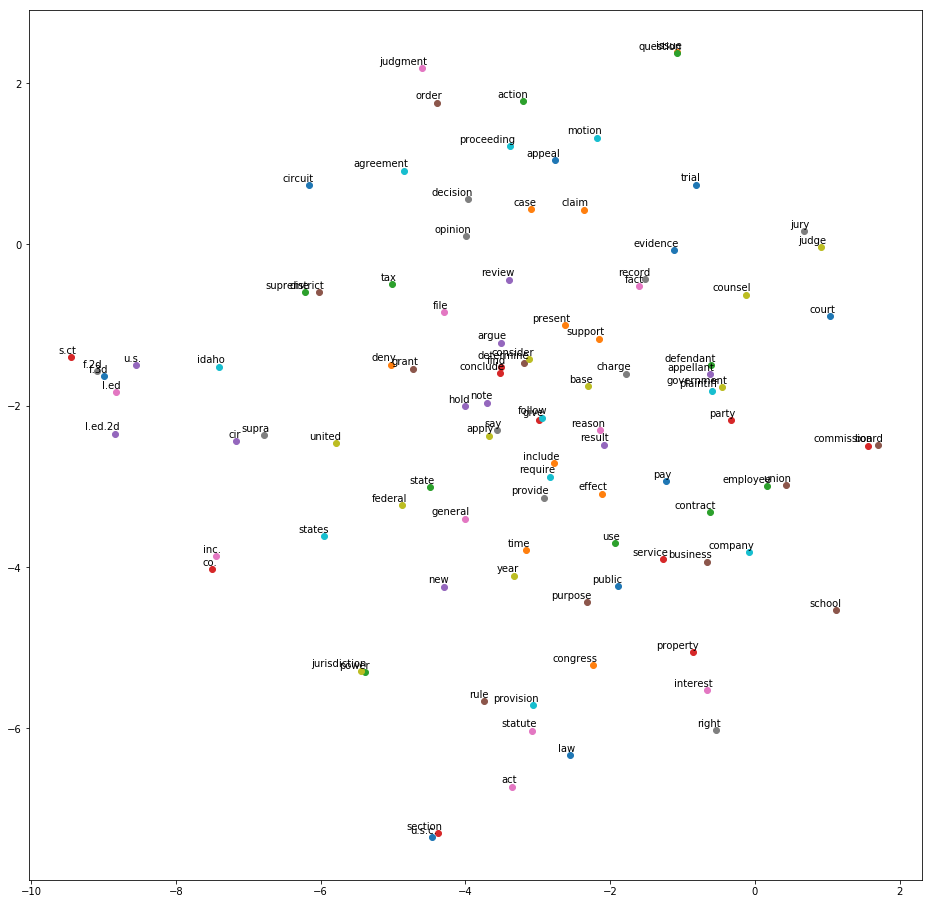

In [86]:

plot_words(words, w2v_small)


## Visualize large-window embeddings

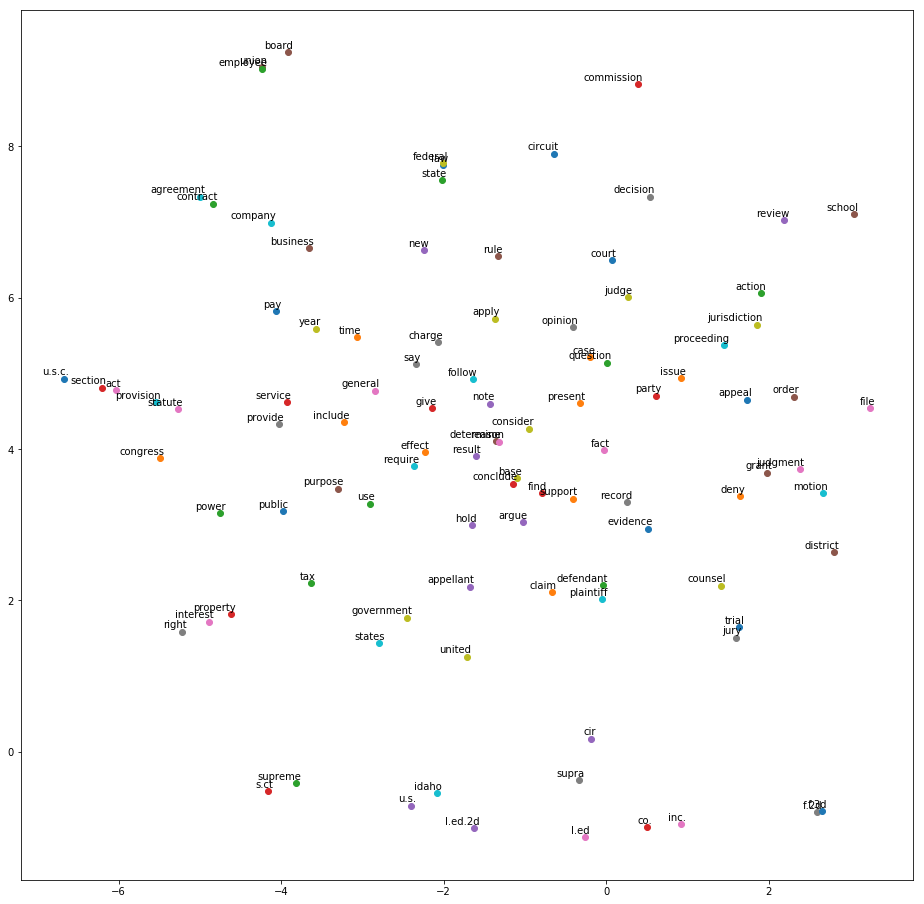

In [87]:

plot_words(words, w2v_large)


## Train separate embeddings for Republican and Democrat judges


### First, build a list of all adjectives

In [88]:

def most_common_adjectives(df: pd.DataFrame, word: str):
  all_adjectives = []

  def extract_adjectives(doc):
      ret = []
      for t in doc:
          if token_is_nonword(t):
              continue
          if t.pos_ != 'ADJ':
              continue
          w = process_token(t)
          all_adjectives.append(w)


  df['doc'].apply(extract_adjectives)

  all_adjectives = list(set(all_adjectives))

  w2v = Word2Vec(df['norm'], size=128, window=3, min_count=1, workers=4).wv

  adj_sims = w2v_dem.cosine_similarities(
      w2v_dem[word],
      [w2v_dem[w] for w in all_adjectives if w in w2v_dem.vocab]
  )

  n = 20

  ind = np.argpartition(adj_sims, -n)[-n: ]
  ind = ind[np.argsort(adj_sims[ind])]
  for i in ind:
      print(all_adjectives[i])



In [89]:

df_dem = df[df['x_republican'] == 0]
most_common_adjectives(df_dem, 'black')


remand
average
foundational
affiant
terrorist
unpermitted
uncoupling
discursive
italicized
visual
human
those
waive
impermissible
retrospective
abundant
traditional
entrepreneurial
selfish
teenage


In [90]:

df_rep = df[df['x_republican'] == 1.0]
most_common_adjectives(df_rep, 'black')


scheduled
precise
parental
wilful
marginal
3rd
rude
devious
flung
iranian
facto
metaphysical
chilling
infelicitous
hawaiian
improper
editorial
evident
plain
victimized


It seems that the democratic ones are more positive adjectives than the republican ones.
